In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import data 
div_stocks_df_original = pd.read_csv('dividend_stocks_only.csv')

In [3]:
# Instantiate a new dataframe using copy.
#We will work on this one keeping the origininal intact.
div_stocks_df = div_stocks_df_original.copy()

In [4]:
# Import data 
full_fin_stocks_df_original = pd.read_csv('full_financial_stocks_raw.csv')

In [5]:
full_fin_stocks_df = full_fin_stocks_df_original.copy()

In [6]:
div_stocks_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [7]:
div_stocks_df.dtypes

symbol                          object
security_name                   object
listing_exchange                object
etf                             object
financial_status                object
zip                             object
sector                          object
fullTimeEmployees              float64
city                            object
state                           object
country                         object
industry                        object
twoHundredDayAverage           float64
trailingAnnualDividendYield    float64
averageDailyVolume10Day          int64
regularMarketPreviousClose     float64
open                           float64
averageVolume10days              int64
dividendRate                   float64
regularMarketVolume              int64
marketCap                      float64
averageVolume                    int64
dayLow                         float64
ask                            float64
fiftyTwoWeekHigh               float64
forwardPE                

In [8]:
full_fin_stocks_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,308518035.0,2.611031e+10,86.30,0.180
1,AA,Alcoa Corporation Common Stock,N,N,NaN,15212,Basic Materials,13800.0,Pittsburgh,PA,...,0.417,-0.24,NaN,22.994,11633009.0,1.10,185121237.0,4.210365e+09,9.12,0.090
2,AADR,AdvisorShares Dorsey Wright ADR ETF,P,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.59,0.008
3,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,416754073.0,3.478515e+10,12.43,0.100
4,AAME,Atlantic American Corporation - Common Stock,Q,N,N,30319,Financial Services,151.0,Atlanta,GA,...,0.371,NaN,NaN,4.964,1620.0,0.46,4879047.0,6.778967e+07,1.95,0.020


In [9]:
# lets see the values counts of etf stocks
full_fin_stocks_df['etf'].value_counts(True)

N    0.551833
Y    0.448167
Name: etf, dtype: float64

In [10]:
# get the columns and their data types
full_fin_stocks_df.dtypes

symbol                          object
security_name                   object
listing_exchange                object
etf                             object
financial_status                object
zip                             object
sector                          object
fullTimeEmployees              float64
city                            object
state                           object
country                         object
industry                        object
twoHundredDayAverage           float64
trailingAnnualDividendYield    float64
averageDailyVolume10Day          int64
regularMarketPreviousClose     float64
open                           float64
averageVolume10days              int64
dividendRate                   float64
regularMarketVolume              int64
marketCap                      float64
averageVolume                    int64
dayLow                         float64
ask                            float64
fiftyTwoWeekHigh               float64
forwardPE                

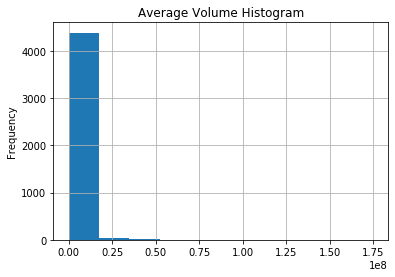

In [11]:
full_fin_stocks_df.averageVolume.hist();
plt.title('Average Volume Histogram');
plt.ylabel('Frequency');

In [12]:
# get a list of all the columns in the data set
full_fin_stocks_df.columns

Index(['symbol', 'security_name', 'listing_exchange', 'etf',
       'financial_status', 'zip', 'sector', 'fullTimeEmployees', 'city',
       'state', 'country', 'industry', 'twoHundredDayAverage',
       'trailingAnnualDividendYield', 'averageDailyVolume10Day',
       'regularMarketPreviousClose', 'open', 'averageVolume10days',
       'dividendRate', 'regularMarketVolume', 'marketCap', 'averageVolume',
       'dayLow', 'ask', 'fiftyTwoWeekHigh', 'forwardPE',
       'fiveYearAvgDividendYield', 'dividendYield', 'bidSize', 'dayHigh',
       'enterpriseToRevenue', 'forwardEps', 'revenueQuarterlyGrowth',
       'bookValue', 'sharesShort', 'shortRatio', 'floatShares',
       'enterpriseValue', 'regularMarketPrice', 'latest_dividend'],
      dtype='object')

In [13]:
# get value counts for listing exchange
full_fin_stocks_df['listing_exchange'].value_counts()

N    1499
P    1347
Q    1234
Z     289
A      78
Name: listing_exchange, dtype: int64

In [14]:
full_fin_stocks_df['listing_exchange'].value_counts(True)

N    0.337081
P    0.302901
Q    0.277490
Z    0.064988
A    0.017540
Name: listing_exchange, dtype: float64

In [15]:
# get value counts for sector
full_fin_stocks_df['sector'].value_counts()

Financial Services        938
Industrials               281
Consumer Cyclical         215
Real Estate               200
Energy                    169
Technology                160
Basic Materials           113
Consumer Defensive         96
Healthcare                 83
Communication Services     76
Utilities                  72
Financial                   1
Name: sector, dtype: int64

In [16]:
full_fin_stocks_df['sector'].value_counts(True)

Financial Services        0.390183
Industrials               0.116889
Consumer Cyclical         0.089434
Real Estate               0.083195
Energy                    0.070300
Technology                0.066556
Basic Materials           0.047005
Consumer Defensive        0.039933
Healthcare                0.034526
Communication Services    0.031614
Utilities                 0.029950
Financial                 0.000416
Name: sector, dtype: float64

In [17]:
# get the shape of the dataset
full_fin_stocks_df.shape

(4447, 40)

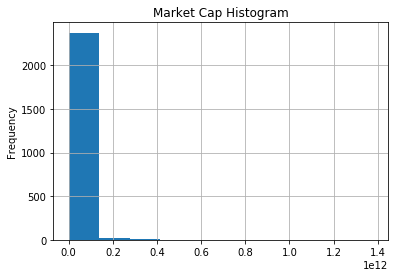

In [18]:
full_fin_stocks_df['marketCap'].hist();
plt.title('Market Cap Histogram');
plt.ylabel('Frequency');

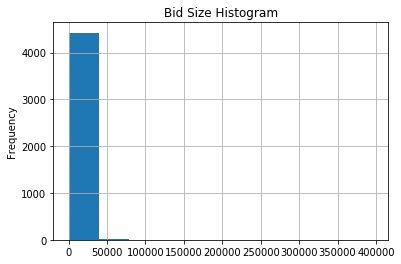

In [19]:
full_fin_stocks_df['bidSize'].hist();
plt.title('Bid Size Histogram');
plt.ylabel('Frequency');

In [20]:
full_fin_stocks_df['state'].value_counts()

NY     262
CA     218
TX     198
IL     186
MA     131
PA      98
OH      78
DE      73
VA      67
FL      66
NJ      62
GA      58
CT      54
WI      39
MI      37
MD      36
CO      35
IN      33
MN      32
NC      30
TN      29
WA      26
MO      22
ON      21
OK      19
AZ      17
AB      16
IA      15
NV      14
LA      14
      ... 
AR       8
QC       8
DF       8
NH       7
BC       7
RI       7
SC       6
ID       5
SD       5
HI       5
WV       5
MS       5
ME       4
DC       4
PR       3
NL       3
SK       2
JA       2
NSW      2
NM       2
AK       2
RJ       2
ND       2
MT       2
RM       1
VIC      1
GJ       1
MG       1
NF       1
VT       1
Name: state, Length: 67, dtype: int64

In [21]:
# We can see that not all companies are in the US

In [22]:
full_fin_stocks_df['financial_status'].value_counts()

N    1213
D      19
E       2
Name: financial_status, dtype: int64

In [23]:
full_fin_stocks_df['revenueQuarterlyGrowth'];

In [24]:
full_fin_stocks_df = full_fin_stocks_df.drop('revenueQuarterlyGrowth',axis=1)

In [25]:
full_fin_stocks_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,86.480,4.987,3.57,15.636,5258241.0,2.55,308518035.0,2.611031e+10,86.30,0.180
1,AA,Alcoa Corporation Common Stock,N,N,NaN,15212,Basic Materials,13800.0,Pittsburgh,PA,...,9.790,0.417,-0.24,22.994,11633009.0,1.10,185121237.0,4.210365e+09,9.12,0.090
2,AADR,AdvisorShares Dorsey Wright ADR ETF,P,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,48.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.59,0.008
3,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,12.550,0.796,-0.04,-6.233,119303588.0,1.49,416754073.0,3.478515e+10,12.43,0.100
4,AAME,Atlantic American Corporation - Common Stock,Q,N,N,30319,Financial Services,151.0,Atlanta,GA,...,1.950,0.371,NaN,4.964,1620.0,0.46,4879047.0,6.778967e+07,1.95,0.020


In [26]:
# See the total number null values in finacial staus
full_fin_stocks_df['financial_status'].isna().sum()

3213

In [27]:
full_fin_stocks_df['financial_status'].value_counts()

N    1213
D      19
E       2
Name: financial_status, dtype: int64

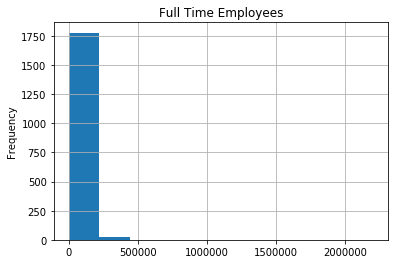

In [28]:
full_fin_stocks_df['fullTimeEmployees'].hist();
plt.title('Full Time Employees');
plt.ylabel('Frequency');

In [29]:
full_fin_stocks_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,86.480,4.987,3.57,15.636,5258241.0,2.55,308518035.0,2.611031e+10,86.30,0.180
1,AA,Alcoa Corporation Common Stock,N,N,NaN,15212,Basic Materials,13800.0,Pittsburgh,PA,...,9.790,0.417,-0.24,22.994,11633009.0,1.10,185121237.0,4.210365e+09,9.12,0.090
2,AADR,AdvisorShares Dorsey Wright ADR ETF,P,Y,NaN,NaN,NaN,NaN,NaN,NaN,...,48.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.59,0.008
3,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,12.550,0.796,-0.04,-6.233,119303588.0,1.49,416754073.0,3.478515e+10,12.43,0.100
4,AAME,Atlantic American Corporation - Common Stock,Q,N,N,30319,Financial Services,151.0,Atlanta,GA,...,1.950,0.371,NaN,4.964,1620.0,0.46,4879047.0,6.778967e+07,1.95,0.020


In [30]:
avg_sector_mcaps = full_fin_stocks_df.groupby('sector').agg({'marketCap':'mean'}).reset_index().sort_values('marketCap',ascending=False)

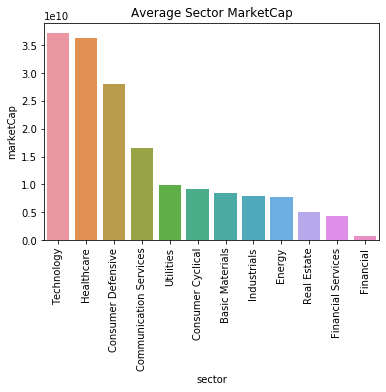

In [31]:
sns.barplot(data = avg_sector_mcaps ,x='sector',y='marketCap');
plt.xticks(rotation=90);
plt.title("Average Sector MarketCap");

In [32]:
avg_emp_sect = full_fin_stocks_df.groupby('sector').agg({'fullTimeEmployees':'mean'}).reset_index()

In [33]:
avg_emp_sect.dropna(inplace =True)

In [34]:
avg_emp_sect = avg_emp_sect.sort_values('fullTimeEmployees',ascending=False)

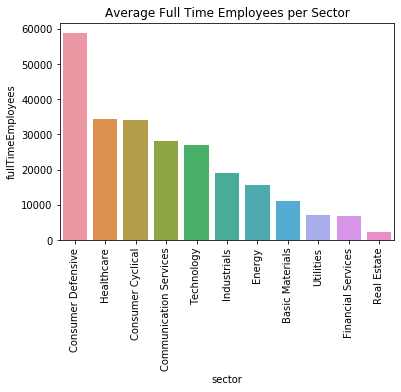

In [35]:
sns.barplot(data = avg_emp_sect ,x='sector',y='fullTimeEmployees');
plt.xticks(rotation=90);
plt.title("Average Full Time Employees per Sector");

In [36]:
avg_bookv_sect = full_fin_stocks_df.groupby('sector').agg({'bookValue':'mean'}).reset_index()

In [37]:
avg_bookv_sect = avg_bookv_sect.sort_values('bookValue',ascending=False)

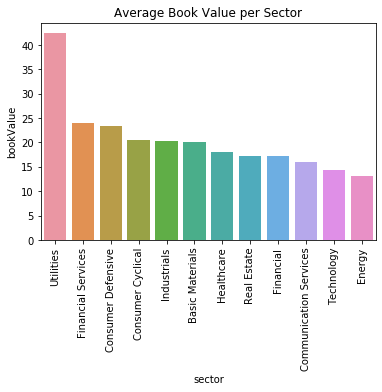

In [38]:
sns.barplot(data = avg_bookv_sect ,x='sector',y='bookValue');
plt.xticks(rotation=90);
plt.title("Average Book Value per Sector");

In [39]:
avg_divr_sect = full_fin_stocks_df.groupby('sector').agg({'dividendRate':'mean'}).reset_index()

In [40]:
avg_divr_sect.head()

,sector,dividendRate
0,Basic Materials,1.195895
1,Communication Services,0.988000
2,Consumer Cyclical,1.109907
3,Consumer Defensive,1.671739
4,Energy,1.291818


In [41]:
avg_divr_sect = avg_divr_sect.sort_values('dividendRate',ascending=False)

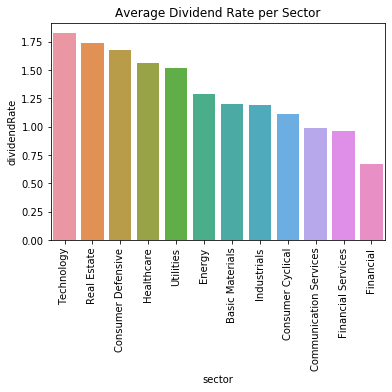

In [42]:
sns.barplot(data = avg_divr_sect ,x='sector',y='dividendRate');
plt.xticks(rotation=90);
plt.title("Average Dividend Rate per Sector");

In [43]:
avg_feps_sect = full_fin_stocks_df.groupby('sector').agg({'forwardEps':'mean'}).reset_index()

In [44]:
avg_feps_sect = avg_feps_sect.sort_values('forwardEps',ascending=False)

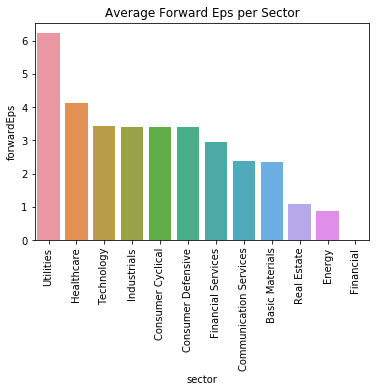

In [46]:
sns.barplot(data = avg_feps_sect ,x='sector',y='forwardEps');
plt.xticks(rotation=90);
plt.title("Average Forward Eps per Sector");

In [47]:
full_fin_stocks_df.columns

Index(['symbol', 'security_name', 'listing_exchange', 'etf',
       'financial_status', 'zip', 'sector', 'fullTimeEmployees', 'city',
       'state', 'country', 'industry', 'twoHundredDayAverage',
       'trailingAnnualDividendYield', 'averageDailyVolume10Day',
       'regularMarketPreviousClose', 'open', 'averageVolume10days',
       'dividendRate', 'regularMarketVolume', 'marketCap', 'averageVolume',
       'dayLow', 'ask', 'fiftyTwoWeekHigh', 'forwardPE',
       'fiveYearAvgDividendYield', 'dividendYield', 'bidSize', 'dayHigh',
       'enterpriseToRevenue', 'forwardEps', 'bookValue', 'sharesShort',
       'shortRatio', 'floatShares', 'enterpriseValue', 'regularMarketPrice',
       'latest_dividend'],
      dtype='object')

In [48]:
full_fin_stocks_df['industry'].value_counts()

Asset Management                         459
Banks—Regional                           309
Oil & Gas E&P                             53
Oil & Gas Midstream                       52
Specialty Industrial Machinery            50
Credit Services                           34
REIT—Mortgage                             33
Software—Application                      32
Specialty Chemicals                       31
Insurance—Property & Casualty             30
Oil & Gas Equipment & Services            29
Telecom Services                          29
Utilities—Regulated Electric              29
Restaurants                               26
Information Technology Services           26
Aerospace & Defense                       26
REIT—Diversified                          25
REIT—Retail                               25
Auto Parts                                25
Capital Markets                           24
Semiconductors                            24
Packaged Foods                            23
REIT—Indus

In [51]:
len(full_fin_stocks_df['industry'].unique())

144

In [52]:
avg_bids_sect = full_fin_stocks_df.groupby('sector').agg({'bidSize':'mean'}).reset_index()

In [53]:
avg_bids_sect = avg_bids_sect.sort_values('bidSize',ascending=False)

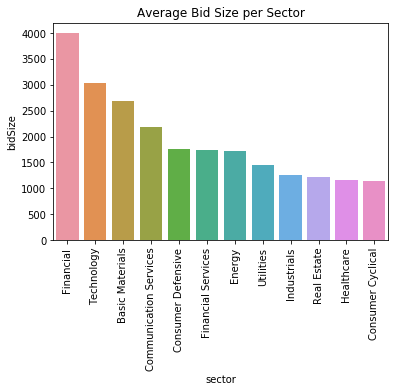

In [55]:
sns.barplot(data = avg_bids_sect ,x='sector',y='bidSize');
plt.xticks(rotation=90);
plt.title("Average Bid Size per Sector");

# NEXT TIME DO A GROUPBY ON THE "INDUSTRY" COLUMN